In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import numpy as np
import os
import gzip
import glob
from time import time
import cv2
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D,Dropout
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten,BatchNormalization
from tensorflow.python.keras.optimizers import Adam,SGD
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.callbacks import TensorBoard

In [3]:
tf.__version__

'1.12.0'

In [4]:
num_classes1 = 1
num_classes2 = 1
num_classes3 = 12
num_classes4 = 1
TotalSize = 96000

In [5]:
x = []
y_class = []
p = 0
for i in glob.glob("classes1/*"):
    for j in glob.glob(i+'/*.jpeg'):
        im = cv2.imread(j)
        x.append(im)
        temp = []
        na = os.path.basename(i)
        tna = na.split('_')
        print(tna)
        temp.append(int(tna[0]))
        temp.append(int(tna[1]))
        temp.append(int(tna[2]))
        temp.append(int(tna[3]))
        y_class.append(temp)
    p+=1
x = np.array(x)
y_class = np.array(y_class)

['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3

['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3', '1']
['1', '0', '3

['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8

['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8', '1']
['0', '1', '8

['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9

['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9', '0']
['0', '0', '9

['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8', '1']
['0', '0', '8

['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2

['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2', '0']
['0', '1', '2

['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1', '11', '0']
['1', '1',

['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0',

['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '0', '11', '0']
['1', '1', '11', '1']
['1', '1', '11', '1']
['1', '1', '11', '1']
['1', '1', '11', '1']
['1', '1',

['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1', '10', '0']
['1', '1',

['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1', '0']
['1', '0', '1

['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0',

['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0', '11', '1']
['1', '0',

['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0', '0']
['0', '0', '0

['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2', '1']
['0', '0', '2

['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6', '1']
['0', '1', '6

['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7', '1']
['0', '0', '7

['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9', '0']
['1', '1', '9

['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0', '0']
['1', '1', '0

['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4', '1']
['0', '1', '4

['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5', '1']
['0', '0', '5

['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9

['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '0', '9', '1']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3

['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3', '0']
['0', '1', '3

['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6', '0']
['1', '1', '6

['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4', '1']
['0', '0', '4

['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0', '1']
['0', '0', '0

['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2', '0']
['1', '1', '2

['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5', '1']
['1', '0', '5

['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9', '1']
['1', '0', '9

['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5', '0']
['0', '0', '5

['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9', '0']
['0', '1', '9

['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0', '10', '0']
['0', '0',

['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0', '11', '0']
['0', '0',

['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8', '1']
['1', '1', '8

['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4', '0']
['0', '0', '4

['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0', '0']
['1', '0', '0

['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0', '1']
['1', '1', '0

['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7', '1']
['1', '0', '7

['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4

['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4', '1']
['1', '1', '4

['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7', '0']
['1', '1', '7

['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3', '0']
['1', '1', '3

['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8', '0']
['1', '0', '8

['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0', '10', '0']
['1', '0',

['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1', '1']
['1', '0', '1

['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1', '0']
['0', '1', '1

['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1', '1']
['0', '0', '1

['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4', '1']
['1', '0', '4

['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2', '1']
['0', '1', '2

['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1', '11', '1']
['0', '1',

['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7', '0']
['1', '0', '7

['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1', '11', '0']
['0', '1',

['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1', '10', '0']
['0', '1',

['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7', '0']
['0', '1', '7

['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8', '1']
['1', '0', '8

['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8', '0']
['1', '1', '8

['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4', '0']
['1', '0', '4

['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3', '0']
['0', '0', '3

['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3', '1']
['1', '1', '3

['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1', '1']
['0', '1', '1

['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '10', '1']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']


['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5', '0']
['1', '0', '5

['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9', '1']
['1', '1', '9

['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5', '0']
['0', '1', '5

['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0', '1']
['1', '0', '0

['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0', '0']
['0', '1', '0

['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1', '0']
['0', '0', '1

['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2

['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['1', '0', '2', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', 

['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0', '11', '1']
['0', '0',

['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4', '0']
['1', '1', '4

['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1', '0']
['1', '1', '1

['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6', '0']
['1', '0', '6

['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4', '0']
['0', '1', '4

['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7', '1']
['1', '1', '7

['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3

['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3', '1']
['0', '1', '3

['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8', '0']
['0', '1', '8

['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5', '0']
['1', '1', '5

['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3', '0']
['1', '0', '3

['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5', '1']
['1', '1', '5

['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0', '1']
['0', '1', '0

['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '1', '6', '0']
['0', '0', '2', '0']
['0', '0', '2', '0']
['0', '0', '2', '0']
['0', '0', '2', '0']
['0', '0', '2

['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5', '1']
['0', '1', '5

['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1', '10', '1']
['0', '1',

['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7', '0']
['0', '0', '7

['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1', '10', '1']
['1', '1',

['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0', '10', '1']
['0', '0',

['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6', '1']
['0', '0', '6

['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8', '0']
['0', '0', '8

['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7

['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7', '1']
['0', '1', '7

['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3', '1']
['0', '0', '3

['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9', '0']
['1', '0', '9

In [6]:
x = np.array(x)
x = x.reshape(TotalSize,28*28*3)
y_class = np.array(y_class)
x_train, x_test, y_train_cls, y_test_cls = train_test_split(x, y_class, test_size=0.40, random_state=42)
train_size = y_train_cls.shape[0]
test_size = y_test_cls.shape[0]
print(train_size,test_size)

57600 38400


In [7]:
y_train1 = y_train_cls[:,0].astype(int)

In [8]:
y_train2 = y_train_cls[:,1].astype(int)

In [9]:
b = np.zeros((train_size, num_classes3))
b[np.arange(train_size), y_train_cls[:,2].astype(int)] = 1
y_train3 = b

In [10]:
y_train4 = y_train_cls[:,3].astype(int)

In [11]:
y_test1 = y_test_cls[:,0].astype(int)

In [12]:
y_test2 = y_test_cls[:,1].astype(int)

In [13]:
b = np.zeros((test_size, num_classes3))
b[np.arange(test_size), y_test_cls[:,2].astype(int)] = 1
y_test3 = b

In [14]:
y_test4 = y_test_cls[:,3].astype(int)

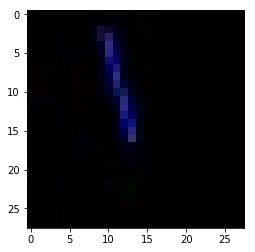

1
0
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
0


In [15]:
imgplot = plt.imshow(x_train.reshape(train_size,28,28,3)[1])
plt.show()
print(y_train1[1])
print(y_train2[1])
print(y_train3[1])
print(y_train4[1])

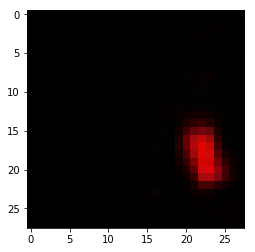

0
1
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
1


In [16]:
imgplot = plt.imshow(x_train.reshape(train_size,28,28,3)[2])
plt.show()
print(y_train1[2])
print(y_train2[2])
print(y_train3[2])
print(y_train4[2])

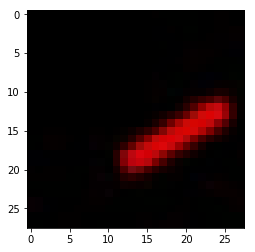

1
1
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1


In [17]:
imgplot = plt.imshow(x_train.reshape(train_size,28,28,3)[3])
plt.show()
print(y_train1[3])
print(y_train2[3])
print(y_train3[3])
print(y_train4[3])

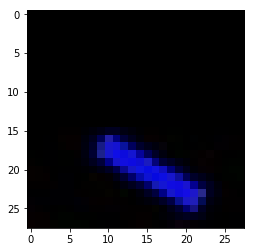

1
1
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
0


In [18]:
imgplot = plt.imshow(x_train.reshape(train_size,28,28,3)[4])
plt.show()
print(y_train1[4])
print(y_train2[4])
print(y_train3[4])
print(y_train4[4])

In [19]:
main_input = Input(shape=(28,28,3,),name='main_input')
X = Conv2D(kernel_size=3, strides=1, kernel_initializer='normal',filters=128,activation='relu', name='layer_conv1')(main_input)
X = Dropout(0.2)(X)
X = MaxPooling2D(pool_size=2, strides=2)(X)
X = Conv2D(kernel_size=3, strides=1, kernel_initializer='normal',filters=64,activation='relu', name='layer_conv2')(X)
X = BatchNormalization()(X)
X = MaxPooling2D(pool_size=2, strides=2)(X)
X = Dropout(0.3)(X)
X = Flatten()(X)

In [20]:
output1 = Dense(1024,kernel_initializer='normal', activation='relu')(X)
output1 = Dense(num_classes1, kernel_initializer='normal',activation='sigmoid', name='output1')(output1)

In [21]:
output2 = Dense(1024,kernel_initializer='normal', activation='relu')(X)
output2 = Dense(num_classes2, kernel_initializer='normal',activation='sigmoid', name='output2')(output2)

In [22]:
output3 = Dense(1024,kernel_initializer='normal', activation='relu')(X)
output3 = Dense(256,kernel_initializer='normal', activation='relu')(output3)
output3 = Dense(num_classes3, kernel_initializer='normal',activation='softmax', name='output3')(output3)

In [23]:
output4 = Dense(1024,kernel_initializer='normal', activation='relu')(X)
output4 = Dense(num_classes4, kernel_initializer='normal',activation='sigmoid', name='output4')(output4)

In [24]:
model = Model(inputs=[main_input], outputs=[output1,output2,output3,output4])

In [25]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 28, 28, 3)    0                                            
__________________________________________________________________________________________________
layer_conv1 (Conv2D)            (None, 26, 26, 128)  3584        main_input[0][0]                 
__________________________________________________________________________________________________
dropout (Dropout)               (None, 26, 26, 128)  0           layer_conv1[0][0]                
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 13, 13, 128)  0           dropout[0][0]                    
__________________________________________________________________________________________________
layer_conv

In [26]:
model.compile(optimizer=Adam(lr=1e-4),
              loss={'output1': 'binary_crossentropy','output2': 'binary_crossentropy','output3': 'categorical_crossentropy','output4': 'binary_crossentropy'},
              loss_weights={'output1': .8, 'output2': .4,'output3': 4.,'output4': .2},metrics=['accuracy'])



In [27]:
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

In [28]:
# And trained it via:
model.fit({'main_input': x_train.reshape(train_size,28,28,3)},
          {'output1': y_train1,'output2': y_train2,'output3': y_train3,'output4': y_train4},
          epochs=5, batch_size=128,verbose=1,
          validation_data=({'main_input': x_test.reshape(test_size,28,28,3)},
                        {'output1': y_test1,'output2': y_test2,'output3': y_test3,'output4': y_test4}),
          callbacks=[tensorboard])

Train on 57600 samples, validate on 38400 samples
Epoch 1/5
57600/57600 [==============================] - 38s 658us/step - loss: 6.6795 - output1_loss: 0.3328 - output2_loss: 0.2379 - output3_loss: 1.5765 - output4_loss: 0.0593 - output1_acc: 0.8609 - output2_acc: 0.9036 - output3_acc: 0.4430 - output4_acc: 0.9833 - val_loss: 3.0263 - val_output1_loss: 0.1705 - val_output2_loss: 0.1054 - val_output3_loss: 0.7110 - val_output4_loss: 0.0179 - val_output1_acc: 0.9215 - val_output2_acc: 0.9591 - val_output3_acc: 0.8104 - val_output4_acc: 0.9993
Epoch 2/5
57600/57600 [==============================] - 36s 627us/step - loss: 2.1954 - output1_loss: 0.0853 - output2_loss: 0.0508 - output3_loss: 0.5256 - output4_loss: 0.0224 - output1_acc: 0.9712 - output2_acc: 0.9830 - output3_acc: 0.8027 - output4_acc: 0.9934 - val_loss: 1.2112 - val_output1_loss: 0.0629 - val_output2_loss: 0.0434 - val_output3_loss: 0.2853 - val_output4_loss: 0.0121 - val_output1_acc: 0.9791 - val_output2_acc: 0.9841 - val_

In [29]:
result = model.evaluate({'main_input': x_test.reshape(test_size,28,28,3)},
                        {'output1': y_test1,'output2': y_test2,'output3': y_test3,'output4': y_test4})

38400/38400 [==============================] - 9s 247us/step


In [30]:
for name, value in zip(model.metrics_names, result):
    print(name, value)

loss 0.2287999009170259
output1_loss 0.016619709571289908
output2_loss 0.01761112538658684
output3_loss 0.051812012858766444
output4_loss 0.006058155855792696
output1_acc 0.996484375
output2_acc 0.9946354166666667
output3_acc 0.9929166666666667
output4_acc 0.999765625


In [31]:
def print_confusion_matrix(cm,num_classes,title):
    recall=[]
    precision=[]
    recall_val = 0
    for i in range(len(cm)):
        num = cm[i][i]
        row_sum=cm[i].sum()
        recall_val = (1.0*num/row_sum)
        recall.append(recall_val);
        precision_val = (1.0*cm[i][i]/cm[:,i].sum())
        precision.append(precision_val)
    f = []
    f.append(np.array(recall))
    f.append(np.array(precision))
    f_score=[]
    for i in range(len(recall)):
        val = 2.0 * recall[i] * precision[i]
        val /= (precision[i]+recall[i])
        f_score.append(val)
    f.append(np.array(f_score))
    print(np.array(f))
#     plt.figure(figsize=(40,40), dpi=200)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.colorbar()
    plt.title(title)
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
#     plt.savefig('3.png')

In [32]:
# Predicting the Test set results
y_pred = model.predict(x_test.reshape(test_size,28,28,3))

[[0.999479   0.99349162]
 [0.99352633 0.99947619]
 [0.99649378 0.99647492]]


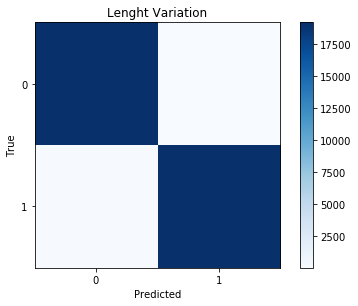

In [33]:
cm = confusion_matrix(y_test1,np.round(y_pred[0], 0).astype(int))
print_confusion_matrix(cm,2,"Lenght Variation")

[[1.         0.98925628]
 [0.98939893 1.        ]
 [0.99467122 0.99459913]]


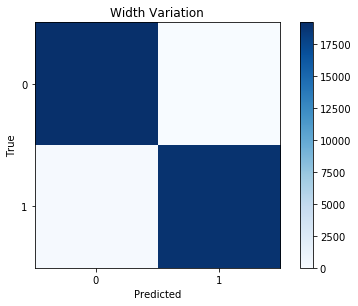

In [34]:
cm = confusion_matrix(y_test2,np.round(y_pred[1], 0).astype(int))
print_confusion_matrix(cm,2,"Width Variation")

[[0.99969018 0.99984239]
 [0.99984507 0.99968482]
 [0.99976762 0.9997636 ]]


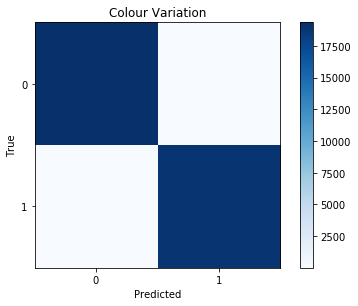

In [35]:
cm = confusion_matrix(y_test4,np.round(y_pred[3], 0).astype(int))
print_confusion_matrix(cm,2,"Colour Variation")

[[0.99590809 0.99294262 0.99872611 0.99150142 0.99559471 0.98550725
  0.98696343 0.98936836 0.99750546 0.99414123 0.99877376 0.98796296]
 [0.98047722 0.99507995 0.99872611 1.         0.99247177 0.9836478
  0.97610063 0.99653543 0.99378689 0.99968992 0.9993865  0.99906367]
 [0.98813242 0.99401014 0.99872611 0.99573257 0.99403079 0.98457664
  0.98150198 0.99293896 0.9956427  0.99690785 0.99908004 0.99348231]]


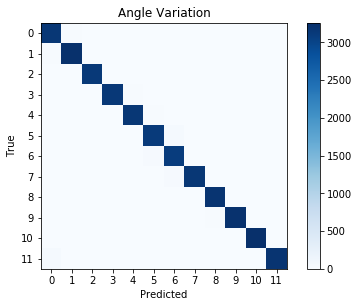

In [36]:
cm = confusion_matrix(np.argmax(y_test3, axis=1), np.argmax(y_pred[2], axis=1))
print_confusion_matrix(cm,12,"Angle Variation")